# 차원 축소 실습

* 실습 목적
    * 차원축소(PCA)를 통해
    * 저차원에서 데이터 시각화와
    * 지도학습과 연계한 모델링 적용


## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler

### (2) 데이터 준비

#### 1) 데이터 로딩

In [2]:
data = pd.read_excel('bankrupt.xlsx')
data.head()

,target,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 94 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  6819 non-null   int64  
 1   col1    6819 non-null   float64
 2   col2    6819 non-null   float64
 3   col3    6819 non-null   float64
 4   col4    6819 non-null   float64
 5   col5    6819 non-null   float64
 6   col6    6819 non-null   float64
 7   col7    6819 non-null   float64
 8   col8    6819 non-null   float64
 9   col9    6819 non-null   float64
 10  col10   6819 non-null   float64
 11  col11   6819 non-null   float64
 12  col12   6819 non-null   float64
 13  col13   6819 non-null   float64
 14  col14   6819 non-null   float64
 15  col15   6819 non-null   float64
 16  col16   6819 non-null   float64
 17  col17   6819 non-null   float64
 18  col18   6819 non-null   float64
 19  col19   6819 non-null   float64
 20  col20   6819 non-null   float64
 21  col21   6819 non-null   float64
 22  

#### 2) 데이터 분할

In [4]:
target = 'target'

x = data.drop(target, axis = 1)
y = data[target]

* train, validation 분할

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

#### 3) 스케일링
* 거리계산 기반 차원축소이므로 스케일링 필요

In [6]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# (옵션)데이터프레임 변환
x_train = pd.DataFrame(x_train, columns=list(x))

## 2.차원 축소 : 주성분 분석 PCA

* 주성분 만들기
    * 전체 변수의 수로 주성분 생성
    * 분산 누적그래프를 그리고 적절한 주성분 수 선택
* 적용
    * 저차원 시각화
    * 지도학습 연계

### (1) 주성분 만들기

* 전체 변수의 수로 주성분 생성


In [9]:
# 주성분을 최대값으로 결정
n = len(x_train.columns)

# 주성분 분석 선언
pca = PCA(n_components=n)

# 만들고, 적용하기
x_train_pc = pca.fit_transform(x_train)
x_val_pc = pca.transform(x_val)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


* 편리하게 사용하기 위해 데이터프레임으로 변환

In [10]:
# 칼럼이름 생성
column_names = [ 'PC'+str(i+1) for i in range(n) ]
column_names

# 데이터프레임으로 변환하기
x_train_pc = pd.DataFrame(x_train_pc, columns = column_names)
x_val_pc = pd.DataFrame(x_val_pc, columns = column_names)
x_train_pc

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93
0,0.268564,0.298680,0.044856,-0.233517,-0.486635,-0.053141,0.030063,-0.508131,0.566326,0.007488,...,0.000022,-0.000010,-0.000009,3.280703e-05,6.568736e-07,-8.636064e-08,1.447751e-11,-4.415837e-17,-1.307082e-16,4.828846e-18
1,-0.368984,0.829718,-0.374252,0.225680,0.516448,0.313019,0.032513,0.057829,-0.012107,-0.204312,...,0.000019,-0.000013,-0.000011,-3.088574e-07,-5.552770e-07,3.830054e-09,-1.951037e-10,-4.198585e-17,-3.110550e-16,-3.282403e-17
2,-0.015635,-0.561833,-0.499602,-0.341244,0.326506,0.219982,-0.136991,-0.252208,-0.285419,0.115575,...,0.001091,-0.000195,0.000031,3.513349e-03,-1.996765e-06,-4.630905e-09,8.804383e-12,-6.941415e-17,1.052361e-16,2.931453e-17
3,-0.369523,0.507412,-0.201278,0.199050,-0.026975,-0.252377,-0.032908,0.069701,-0.012408,-0.069139,...,-0.000074,0.000027,-0.000051,-2.425677e-05,3.819193e-07,-8.545501e-08,5.241009e-12,-2.537433e-17,3.502785e-17,-6.398665e-17
4,0.177552,0.013716,0.072037,-0.325762,0.062938,-0.221169,-0.199524,0.388884,-0.237904,0.426591,...,-0.000129,0.000029,-0.000042,6.875373e-05,-3.287491e-07,5.109429e-10,-1.768601e-10,-4.706289e-19,5.338768e-18,4.571401e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4768,-0.610358,0.002941,0.353054,0.117132,0.213072,-0.364325,-0.095762,-0.147537,0.050767,-0.206594,...,-0.000026,0.000012,0.000007,1.373515e-05,-2.073960e-06,8.354050e-08,-7.105429e-13,-1.198285e-16,1.433656e-17,2.198423e-17
4769,0.183370,0.133171,0.268309,-0.337142,0.132322,-0.201374,-0.157880,0.391279,-0.282424,0.248358,...,0.000041,-0.000033,-0.000018,-2.120794e-05,1.637878e-06,-7.628967e-08,-4.117148e-13,9.711727e-17,2.968330e-17,1.650652e-17
4770,0.347250,0.455012,0.483551,-0.314726,-0.411334,0.204246,-0.083035,0.255207,-0.355523,-0.360273,...,-0.000036,0.000020,-0.000021,3.308128e-06,1.589753e-06,-1.965838e-09,3.507045e-12,2.202375e-17,2.154119e-17,2.416445e-18
4771,-0.474584,0.235871,-0.114341,-0.062957,-0.329178,-0.315744,0.455614,-0.010333,-0.035812,-0.045787,...,0.000064,0.000415,0.000024,6.290346e-05,-1.600401e-08,-1.770745e-09,-1.150918e-12,2.160063e-16,7.399062e-18,-3.605557e-18


### (2) 주성분 누적 분산 그래프
* 그래프를 보고 적절한 주성분의 개수를 지정(elbow method!)
* x축 : PC 수
* y축 : 전체 분산크기 - 누적 분산크기

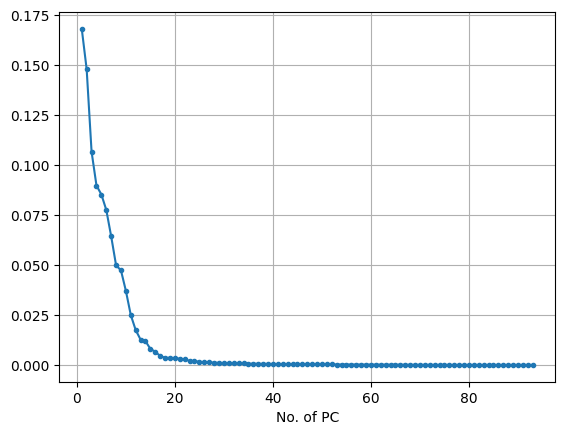

In [11]:
plt.plot(range(1,n+1), pca.explained_variance_ratio_, marker = '.')
plt.xlabel('No. of PC')
plt.grid()
plt.show()

주성분 개수 몇개면 충분할까요?

In [ ]:
# 16

### (3) 시각화
* 주 성분 중 상위 2개를 뽑아 시각화 해 봅시다.
* 본 데이터는 시각화 결과가 만족스럽지는 않습니다.^^;;

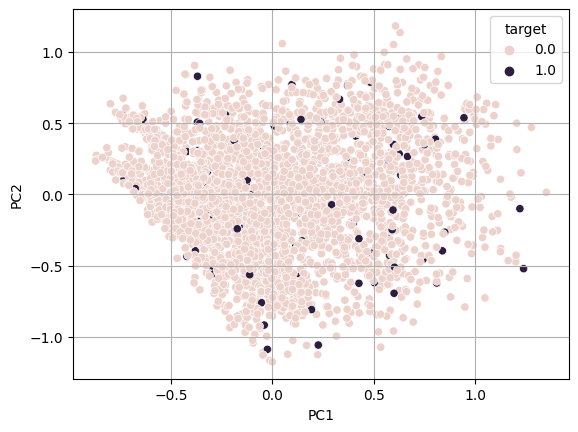

In [12]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = x_train_pc, hue = y_train)
plt.grid()
plt.show()

* [참조]feature 간 상호 상관관계 살펴보기
    * 아래 내용은 참조 자료입니다.

<Axes: >

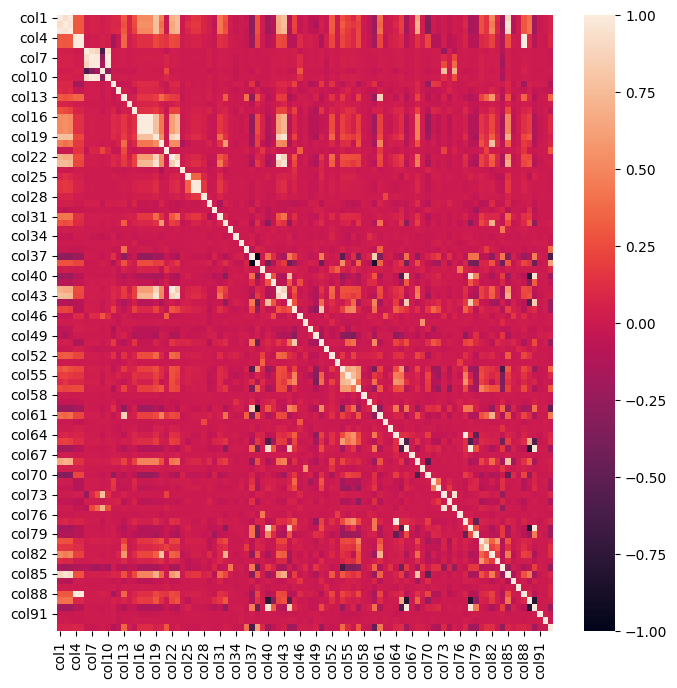

In [13]:
plt.figure(figsize = (8, 8))
sns.heatmap(x_train.corr())

<Axes: >

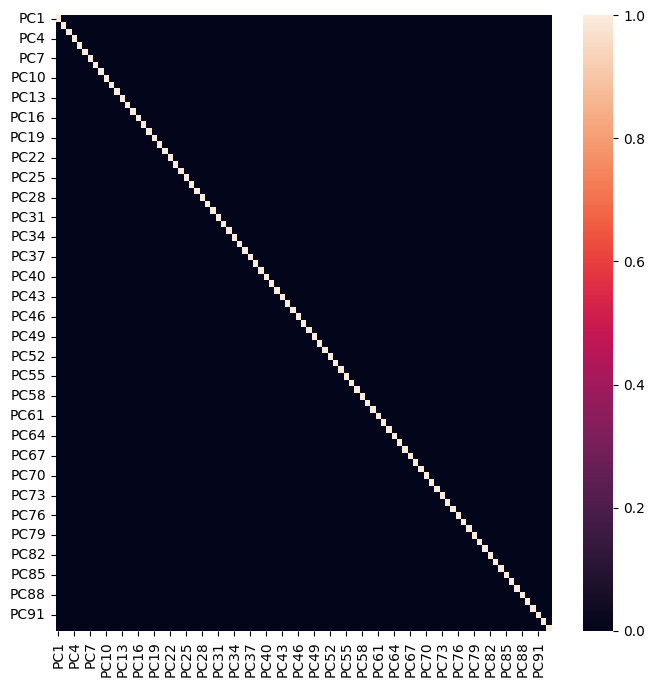

In [14]:
plt.figure(figsize = (8, 8))
sns.heatmap(x_train_pc.corr())

### (4) 지도학습으로 연계하기

#### 1) 원본데이터로 모델 생성하기
* 로지스틱 회귀로 분류 모델을 생성해 봅시다.

* 학습

In [15]:
# 모델 선언
model0 = LogisticRegression()

# 학습
model0.fit(x_train, y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* 예측 및 평가

In [16]:
# 예측
pred0 = model0.predict(x_val)

# 평가
print(confusion_matrix(y_val, pred0))
print(accuracy_score(y_val, pred0))
print(classification_report(y_val, pred0))

[[1986    3]
 [  53    4]]
0.9726295210166178
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1989
           1       0.57      0.07      0.12        57

    accuracy                           0.97      2046
   macro avg       0.77      0.53      0.56      2046
weighted avg       0.96      0.97      0.96      2046



c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### 2) 주성분 분석 데이터로 모델링
* 다음의 조건으로 모델을 만들고 성능을 확인해 봅시다.
    * 알고리즘 : KNN

In [17]:
# 여러분이 선택한 주성분 개수
n = 17

# 데이터 준비
cols = column_names[:n]
x_train_pc_n = x_train_pc.loc[:, cols]
x_val_pc_n = x_val_pc.loc[:, cols]

# 모델 선언 및 학습
model_n = LogisticRegression()
model_n.fit(x_train_pc_n, y_train)


LogisticRegression()

In [18]:
# 예측
pred_n = model_n.predict(x_val_pc_n)

# 평가
print(confusion_matrix(y_val, pred_n))
print(accuracy_score(y_val, pred_n))
print(classification_report(y_val, pred_n))

[[1986    3]
 [  52    5]]
0.9731182795698925
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1989
           1       0.62      0.09      0.15        57

    accuracy                           0.97      2046
   macro avg       0.80      0.54      0.57      2046
weighted avg       0.96      0.97      0.96      2046



## 3.[참조] t-SNE

### (1) 학습(차원축소)

In [19]:
from sklearn.manifold import TSNE

In [20]:
# 2차원으로 축소하기
tsne = TSNE(n_components = 2, random_state=20)
x_tsne = tsne.fit_transform(x)

# 사용의 편리함을 위해 DataFrame으로 변환
x_tsne = pd.DataFrame(x_tsne, columns = ['T1','T2'])

In [21]:
x_tsne.shape

(6819, 2)

### (2) 시각화

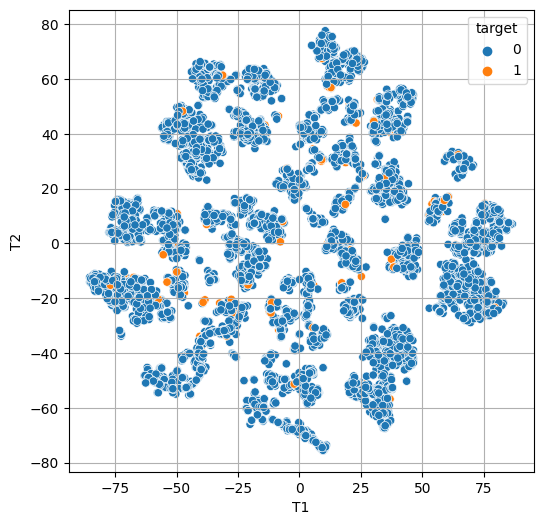

In [22]:
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'T1', y = 'T2', data = x_tsne, hue = y)
plt.grid()